In [1]:
#importing necessary python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\GENE Enrichment\\FINAL VISUALISATION\\SUPPLENMENTARY')#setting the right directory

In [3]:
# Importing the dataset
dt = pd.read_excel('FEATURES_MEAN_PATHWAYS.xlsx',index_col=0)

In [4]:
#Standardization
scaler = StandardScaler()
dt_std = scaler.fit_transform(dt)

In [5]:
pca = PCA()
pca.fit(dt_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
# We choose 4 components 
pca = PCA(n_components =4)

In [7]:
# Fit the model with the selected number of components
pca.fit(dt_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# Calculated resulting components scores
pca.transform(dt_std)

array([[ 1.29324724,  0.77738429, -0.04976522,  0.07071919],
       [-0.84297713,  0.02052923, -0.63201453, -1.14700557],
       [ 0.46294112,  0.955006  , -0.95514346, -0.05942078],
       ...,
       [ 0.87179455, -2.07514156,  0.71180718, -0.45251496],
       [-0.96157251,  0.10736799, -0.51356984,  0.15612421],
       [ 0.99827533, -1.24927088, -0.48694603, -1.04957845]])

In [9]:
scores_pca = pca.transform(dt_std)

In [10]:
# Fit K means using the transformed data from the PCA
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

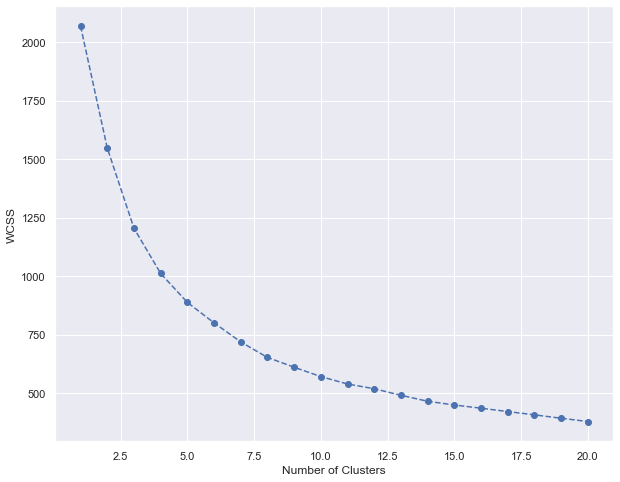

In [11]:
plt.figure(figsize = (10,8))
ax = plt.axes()
sns.set_style("white")
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\MEANPATHWAYSCLUSTER_NOCLUSTERS.pdf', bbox_inches="tight")
plt.show()

In [12]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer 
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++')

In [13]:
# Fit with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
y_kmeans = kmeans_pca.fit_predict(scores_pca)

In [15]:
y_kmeans

array([2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 1, 3, 0, 1,
       2, 1, 0, 0, 1, 2, 3, 0, 0, 3, 1, 0, 3, 2, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 2, 0, 0, 1, 0, 0, 1, 3, 1, 2, 1, 0, 2, 1, 2, 3, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1,
       3, 0, 0, 1, 1, 0, 0, 3, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 3, 1,
       3, 3, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0,
       2, 1, 2, 1, 1, 3, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 3, 2, 0, 3, 0,
       0, 1, 0, 3, 1, 0, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1,
       0, 0, 2, 0, 0, 3, 1, 1, 3, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3, 1,
       3, 0, 1, 1, 0, 3, 2, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 3, 1, 3, 0, 1, 3, 2, 3, 1, 3, 1, 1, 0, 1, 2,
       0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1,

In [16]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
dt_pca_kmeans = pd.concat([dt.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
dt_pca_kmeans.columns.values[-4:] = ['PC1','PC2','PC3','PC4']
# The last column we add contains the pca k-means clustering labels.
dt_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [17]:
dt_pca_kmeans.head()

,Fatty acid activation (cytosolic),Fatty acid oxidation,Folate metabolism,Glycolysis / Gluconeogenesis,PC1,PC2,PC3,PC4,Segment K-means PCA
0,249.678953,203.645436,174.799119,975.407107,1.293247,0.777384,-0.049765,0.070719,2
1,159.843340,192.578976,162.708229,596.051379,-0.842977,0.020529,-0.632015,-1.147006,0
2,238.077530,178.637863,159.695851,792.714842,0.462941,0.955006,-0.955143,-0.059421,0
3,195.749178,197.644572,173.262205,826.557095,0.237389,0.501537,-0.153377,-0.737040,0
4,192.524866,240.636053,151.606225,636.320877,-0.270400,-1.003226,0.143327,-0.109464,1


In [18]:
# Adding name on the segement
dt_pca_kmeans['Segment'] = dt_pca_kmeans['Segment K-means PCA'].map({0:'Cluster0',
                                                                    1:'Cluster1',
                                                                    2:'Cluster2',
                                                                    3:'Cluster3'})

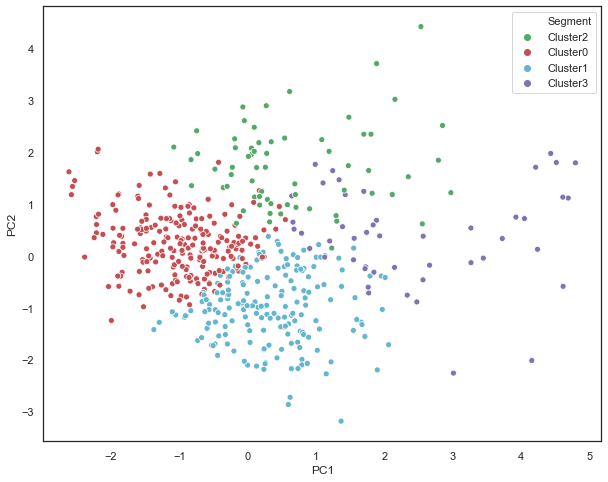

In [19]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second
x_axis = dt_pca_kmeans['PC1']
y_axis = dt_pca_kmeans['PC2']
plt.figure(figsize = (10, 8))
sns.set_style("white")
sns.scatterplot(x_axis, y_axis, hue = dt_pca_kmeans['Segment'], palette = ['g', 'r', 'c','m'])
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\MEANPATHWAYSCLUSTER_PLOT1.pdf', bbox_inches="tight")
plt.show()